# Importing the Data
### by: TM

In [8]:
# Installing packages
!pip install ibllib

     |████████████████████████████████| 1.2 MB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 49.5 MB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.7 MB/s  eta 0:00:01


In [1]:
# Import the packages
import numpy as np
import matplotlib.pyplot as plt
from oneibl.onelight import ONE
import os

one = ONE()

In [2]:
# @ Set some global variables
figsize = [12,12]
dpi = 400

In [245]:
# @ Setting up helper functions
def load_data(sn):
    """ loads the data to RAM.
    Args
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            spikes: (dict) dictionary including spike data
            wheelmoves: (dict) dictionary including wheel movement data
    """
    session = sessions[sn];
    spikes = one.load_object(session, 'spikes');
    wheelmoves = one.load_object(session, 'wheelMoves');
    return spikes, wheelmoves
    
def plot_session_raster(sn):
    """ plots the raster for the spikes on the specified session number (sn) from the ONE data.
        Args:
        - inputs:
            sn: (np.1darray) the number of the desired session
        - outputs:
            1. matplotlib figure
            2. also saves it to the $pwd as "%$sn.png".
    """
    spikeraster = plt.figure(figsize=figsize, dpi=dpi);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot(sp, cl, ',');
    spikeraster = plt.vlines(wheelmoves['intervals'], 0, max(spikes['clusters']), 'r', lw=0.1)
    plt.savefig("%s.png" % sn, dpi=dpi)
    
def plot_trial_raster(tn):
    """ plots the raster for the spikes on the specified trial number (tn) from the ONE data.
        Args:
        - inputs:
            tn: (np.1darray) the number of the desired trial
        - outputs:
            matplotlib.plt figure
    """
    spikeraster = plt.figure(figsize=[4,4], dpi=dpi/6);
    spikeraster = plt.axis("off");
    spikeraster = plt.plot((trials[tn])[0],(trials[tn])[1], ',');

In [16]:
# # @title **[do not run]** Download the files from source (No need to run. The files are already stored in the GDrive, and are also availble through ONE)
# # Run this field if you do not have the necessary files on GDrive. This will take approx 15 GB of space ~35-40 min of time!


# !unzip "!wget https://ndownloader.figshare.com/articles/9974357/versions/2"
# %cp /content/nicklab* '/content/gdrive/My Drive/Project/Datasets/Steinemtz/Train' -rv

----
### Import data from FigShare to `ONE`
Run this field if you prefer to work from the online data. The API will only download the files you specify with `load_object`.

In [24]:
# # Import from this link:

one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357");
sessions = one.search(['spikes'])
sessions

['nicklab/Subjects/Cori/2016-12-14/001',
 'nicklab/Subjects/Cori/2016-12-17/001',
 'nicklab/Subjects/Cori/2016-12-18/001',
 'nicklab/Subjects/Forssmann/2017-11-01/001',
 'nicklab/Subjects/Forssmann/2017-11-02/001',
 'nicklab/Subjects/Forssmann/2017-11-04/001',
 'nicklab/Subjects/Forssmann/2017-11-05/001',
 'nicklab/Subjects/Hench/2017-06-15/001',
 'nicklab/Subjects/Hench/2017-06-16/001',
 'nicklab/Subjects/Hench/2017-06-17/001',
 'nicklab/Subjects/Hench/2017-06-18/001',
 'nicklab/Subjects/Lederberg/2017-12-05/001',
 'nicklab/Subjects/Lederberg/2017-12-06/001',
 'nicklab/Subjects/Lederberg/2017-12-07/001',
 'nicklab/Subjects/Lederberg/2017-12-08/001',
 'nicklab/Subjects/Lederberg/2017-12-09/001',
 'nicklab/Subjects/Lederberg/2017-12-10/001',
 'nicklab/Subjects/Lederberg/2017-12-11/001',
 'nicklab/Subjects/Moniz/2017-05-15/001',
 'nicklab/Subjects/Moniz/2017-05-16/001',
 'nicklab/Subjects/Moniz/2017-05-18/001',
 'nicklab/Subjects/Muller/2017-01-07/001',
 'nicklab/Subjects/Muller/2017-01-

## The list of the sessions:
- The first 5 (0 through 4) are the test set
- The second 5 (5 through 9) are the validation set
- The other 29 (10 through 38) are the training set

## Import to RAM:
The choice `sn` sets the session number from the list above.

We will use the helper functions `load_data` and `plot_raster` to repsectively import the data from ONE API and to plot the raster plot based on the times and clusters of neurons. ONE API uses `memmaps`, which means the matrices stay in the long-term storage and only a soft link is stored in storage, until immutations are done.


In [217]:
sn = 12

spikes, wheelmoves = load_data(sn)


sp = spikes['times'][:,0]  # spike times
cl = spikes['clusters'][:,0]   # spike clusters
ints = wheelmoves['intervals']  # intervals of moving the wheel [in seconds]
intpts = ints * srate  # intervals of moving the wheel [datapoints]
intpts = np.round(intpts).astype(int)
moves = wheelmoves['intervals'][:,1]-wheelmoves['intervals'][:,0]  # length of each interval
wmt = wheelmoves['type']

# ## Clean up the wheel moves. Some seem to have NaN or abnormal activity recorded,
# ## we will discard those as immobile. Immutes the dict:

for i in range(len(wmt)):
    if wmt[i][0]==3:
        wmt[i][0] = 0

# Extracting metadata:
srate = len(spikes['times'])/spikes['times'][-1]
dt = 1/srate

print('Sampling rate of this set is approximately %s Hz' % round(srate[0],2))

Sampling rate of this set is approximately 7106.94 Hz


This will yield two dictionaries:
#### **1.** `spikes`
- `amps`: **amplitudes of the spikes**
- `clusters`:  **spatial index (location)** 
- `depths`: **diff between the amplitudes of the spike and the directly previous spike"
- `times`: **temporal index**

We will mainly use the `clusters` and the `times` of the spikes.

#### **2.** `wheels`
with the keys:
- `position`
- `timestamps`

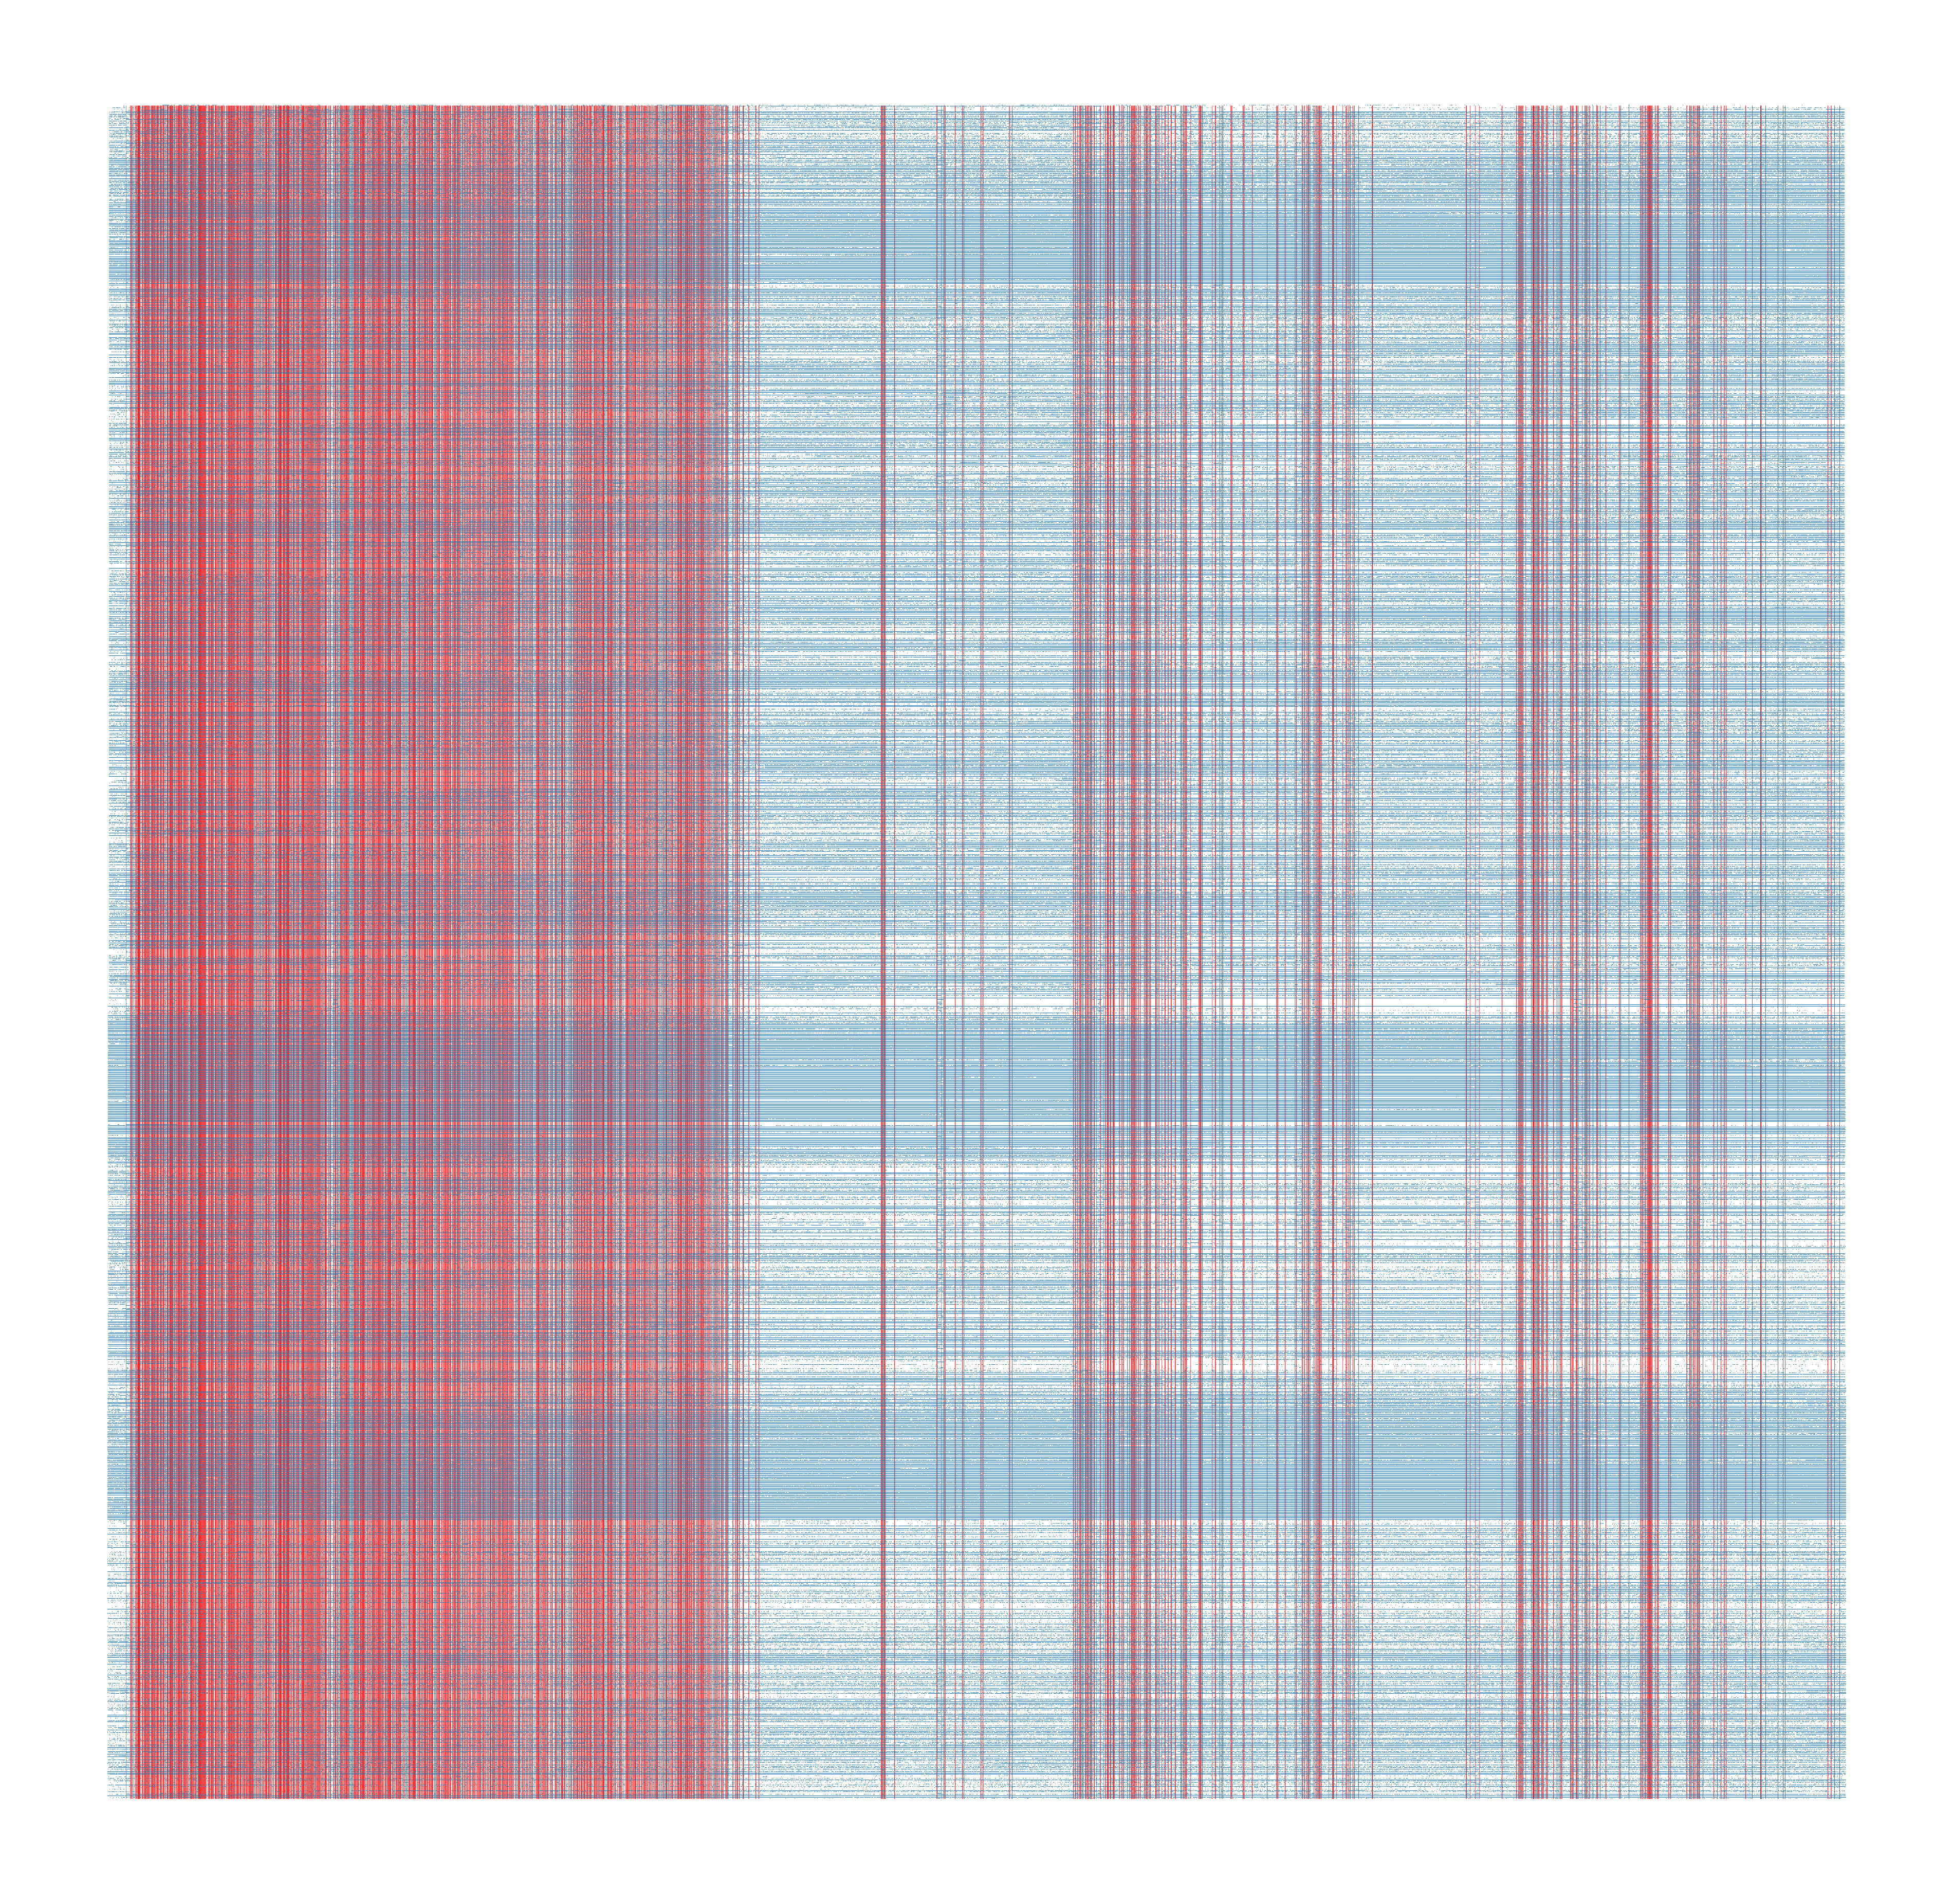

In [75]:
# Raster plot of all spikes based on `sp` and `cl` in the whole session

plot_session_raster(sn)

## Extracting the events from the dataset

The extracted data are:
- `trials[0]`: spike timing
- `trials[1]`: spike location (cluster)
- `wmt`: wheel movement type. `1`=clockwise, `2`=counterclockwise

In [238]:
trials = [np.hstack([np.vstack([[sp[intpts[i,0]:intpts[i,1]]],
                                [cl[intpts[i,0]:intpts[i,1]]]])]) for i in range(len(ints))]

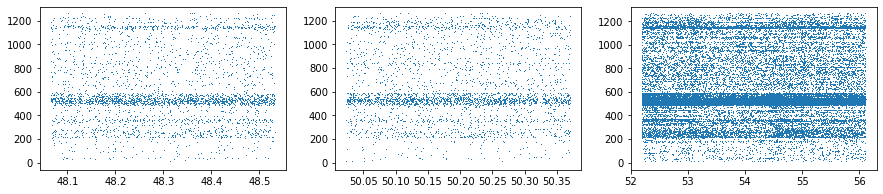

In [297]:
# To test: print rasters from the first three trials
n=3
figt = plt.figure(figsize=[15,3]);
for i in range(1,n+1):
    axt1 = figt.add_subplot(1,n,i);
    axt1.plot(trials[i][0],trials[i][1],',');

In [236]:
wmt[0:10]

array([[2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.]])

&nbsp;

&nbsp;

Scratchbook:

In [ ]:
def cutter(spiketimes, moves):
    """cuts the datasets based on the wheel moves
    Args:
    spiketimes (np.ndarray):spike times accross different clusters
    """
    output=[]

In [30]:
def my_moving_window(x):
    y = np.zeros_like(x)
    for i in range(0, len(x)-1):
        y[i]=x[i+1]-x[i]
    return y

In [127]:
class data:
    def __init__(self, trial, times, clusters, direction):
        self.trial = trial
        self.trial.times = times
        self.trial.clusters = clusters
        self.trial.direction = direction

array([[  36.23898044,   43.50298044],
       [  45.08498044,   45.53298044],
       [  47.23698044,   47.66098044],
       ...,
       [3358.39598044, 3358.50998044],
       [3364.67198044, 3364.80398044],
       [3374.92498044, 3374.97598044]])